# Human Activity Recognition Using Smartphones (UCI HAR)

## Dataset Overview

- **Source:** [UCI Machine Learning Repository – Human Activity Recognition Using Smartphones](https://archive.ics.uci.edu/dataset/240/human+activity+recognition+using+smartphones)  
- **Description:**  
  This dataset contains measurements from the accelerometers and gyroscopes of a Samsung Galaxy S smartphone worn by 30 volunteers while performing six activities:  
  1. WALKING  
  2. WALKING_UPSTAIRS  
  3. WALKING_DOWNSTAIRS  
  4. SITTING  
  5. STANDING  
  6. LAYING  

- **Data format:**  
  - **Training set:** 7,352 windows (rows)  
  - **Test set:** 2,947 windows (rows)  
  - **Features:** 561 pre-processed sensor signals per window (columns)  
    - Time-domain features: means, standard deviations, medians, etc.  
    - Frequency-domain features: Fourier transforms, energy, entropy, etc.  
    - Derived features: jerk signals, vector magnitudes, and angles  

- **Purpose of this project:**  
  - Explore the dataset using **EDA** (feature distributions, correlations, PCA).  
  - Train a **PyTorch classifier** to predict the activity from the 561 features.  
  - Evaluate the classifier on the test set and visualize the results.  

### Notes:

- Each row represents a 2.56-second window of sensor data (128 readings per window).  
- The features are already preprocessed and normalized to make machine learning easier.  
- The dataset is widely used for human activity recognition research and benchmarking.

## Project Goals

In this project, we classify human activities (walking, sitting, laying, etc.)
using smartphone accelerometer and gyroscope data.

As stated above, the dataset has 561 engineered features extracted from sensor signals
(time and frequency domain). Our goal is to:
1. Explore the dataset (EDA).
2. Build a classifier with PyTorch.
3. Evaluate performance on the test set.


## Library Imports

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

## Load the UCI HAR Dataset  

In this section, we load the **Human Activity Recognition (HAR)** dataset:  

- **Training and Test Splits**:  
  - `X_train` / `X_test` contain the feature values (561 sensor-based variables).  
  - `y_train` / `y_test` contain the activity labels (what the person was doing).  

- **Feature Names**:  
  The dataset provides a `features.txt` file with the names of the 561 features.  
  We load these names and assign them to the columns of `X_train` and `X_test`  
  for easier interpretation during exploration.  

- **Activity Labels**:  
  Activities are coded as integers (`1–6`). We map them to descriptive labels:  
  - 1 → WALKING  
  - 2 → WALKING_UPSTAIRS  
  - 3 → WALKING_DOWNSTAIRS  
  - 4 → SITTING  
  - 5 → STANDING  
  - 6 → LAYING  

- **Output Check**:  
  Finally, we print the shape of the training and test sets to confirm sizes,  
  and we display the unique activity classes to ensure mapping worked correctly.  


In [82]:
# -----------------------------
# Load dataset
# -----------------------------
print("Loading UCI HAR Dataset...")

X_train = pd.read_csv("./UCI HAR Dataset/train/X_train.txt", sep='\\s+', header=None)
y_train = pd.read_csv("./UCI HAR Dataset/train/y_train.txt", sep='\\s+', header=None)
X_test = pd.read_csv("./UCI HAR Dataset/test/X_test.txt", sep='\\s+', header=None)
y_test = pd.read_csv("./UCI HAR Dataset/test/y_test.txt", sep='\\s+', header=None)

# Load feature names
features = pd.read_csv("./UCI HAR Dataset/features.txt", sep='\\s+', header=None)[1].tolist()
X_train.columns = features
X_test.columns = features

# Map activity labels
activity_labels = {
    1: "WALKING",
    2: "WALKING_UPSTAIRS",
    3: "WALKING_DOWNSTAIRS",
    4: "SITTING",
    5: "STANDING",
    6: "LAYING"
}
y_train = y_train[0].map(activity_labels)
y_test = y_test[0].map(activity_labels)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)
print("Classes:", y_train.unique())

Loading UCI HAR Dataset...
Train shape: (7352, 561)
Test shape: (2947, 561)
Classes: ['STANDING' 'SITTING' 'LAYING' 'WALKING' 'WALKING_DOWNSTAIRS'
 'WALKING_UPSTAIRS']


## Class Distribution

Plot class distribution to check if the dataset is balanced.  If some classes dominate (imbalanced dataset) then the model could be biased.

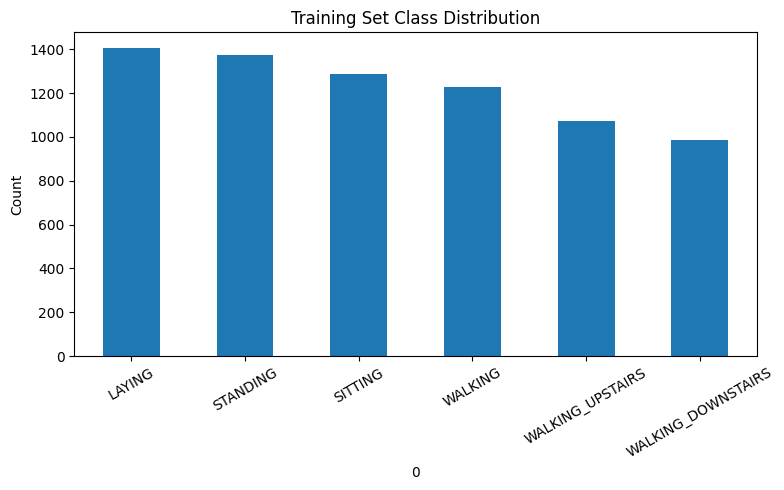

In [83]:
# -----------------------------
# Class distribution
# -----------------------------
plt.figure(figsize=(8, 5))
y_train.value_counts().plot(kind="bar", title="Training Set Class Distribution")
plt.ylabel("Count")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

## Feature Statistics

In the below we compute feature statistics - this helps us with the following:

1) Detecting Scale Differences
2) Spotting Redundant Features (Idential Distributions)
3) Identifying Outliers - outliers can heavily affect models if not handled
4) Understanding Feature Importance
5) Guiding Feature Engineering

In [84]:
# -----------------------------
# Feature Statistics
# -----------------------------
summary = X_train.describe().T
print("\nFeature summary (first 10):")
print(summary.head(10))


Feature summary (first 10):
                    count      mean       std       min       25%       50%  \
tBodyAcc-mean()-X  7352.0  0.274488  0.070261 -1.000000  0.262975  0.277193   
tBodyAcc-mean()-Y  7352.0 -0.017695  0.040811 -1.000000 -0.024863 -0.017219   
tBodyAcc-mean()-Z  7352.0 -0.109141  0.056635 -1.000000 -0.120993 -0.108676   
tBodyAcc-std()-X   7352.0 -0.605438  0.448734 -1.000000 -0.992754 -0.946196   
tBodyAcc-std()-Y   7352.0 -0.510938  0.502645 -0.999873 -0.978129 -0.851897   
tBodyAcc-std()-Z   7352.0 -0.604754  0.418687 -1.000000 -0.980233 -0.859365   
tBodyAcc-mad()-X   7352.0 -0.630512  0.424073 -1.000000 -0.993591 -0.950709   
tBodyAcc-mad()-Y   7352.0 -0.526907  0.485942 -1.000000 -0.978162 -0.857328   
tBodyAcc-mad()-Z   7352.0 -0.606150  0.414122 -1.000000 -0.980251 -0.857143   
tBodyAcc-max()-X   7352.0 -0.468604  0.544547 -1.000000 -0.936219 -0.881637   

                        75%       max  
tBodyAcc-mean()-X  0.288461  1.000000  
tBodyAcc-mean()-Y -0.

## Feature Statistics Summary (first 10 features)

The table above shows descriptive statistics for the first 10 sensor features.  
Each row is a feature (e.g., `tBodyAcc-mean()-X` = mean body acceleration along the X-axis).  
Each column is a summary statistic across all 7,352 training samples:

- **count**: number of samples (always 7352 here).  
- **mean / std**: average and variability of the feature.  
- **min / max**: range of observed values.  
- **25% / 50% / 75%**: quartiles of the distribution.

### How to interpret these values:
- **Center & Spread**:  
  `tBodyAcc-mean()-X` has a mean around 0.27 with a std of 0.07 → values are tightly clustered.  
  By contrast, `tBodyAcc-std()-Y` has a mean near -0.51 with a std of 0.50 → much wider spread.

- **Activity Signal vs. Noise**:  
  Features with strong variation (like standard deviations and maximums) may better distinguish between activities, since walking vs. sitting should produce very different movement ranges.

- **Range Check**:  
  Many features have min/max close to -1 and 1. This hints that signals were normalized during preprocessing.

- **Potential Redundancy**:  
  `tBodyAcc-std()` and `tBodyAcc-mad()` look quite similar in distribution. That’s something we might explore later when looking at correlations.

Overall, these statistics give us a first impression of **which features carry discriminative signal** and whether the dataset looks well-prepared for modeling.


## Correlation Heatmap

In the correlation heatmap we're looking for feature redundancy, unexpected relationships, and anything that can help us with feature engineering.

A correlation heatmap shows how strongly features relate to each other.  

Each cell represents the correlation coefficient between two features:

- **+1 (bright red)** → features increase together (strong positive correlation)  
- **-1 (bright blue)** → one feature increases while the other decreases (strong negative correlation)  
- **0 (white or neutral)** → no linear relationship  

### How to interpret the heatmap:

1. **Diagonal**: Always +1, because each feature is perfectly correlated with itself.  

2. **Feature clusters**:  
   - Bright red blocks indicate groups of features that are highly correlated.  
   - For example, `tBodyAcc-mean()-X`, `tBodyAcc-mean()-Y`, and `tBodyAcc-mean()-Z` often cluster together because they all measure body acceleration along different axes.  

3. **Negative correlations**:  
   - Bright blue areas show features that move in opposite directions.  
   - These can be useful for understanding contrasting signals (e.g., walking vs laying).  

4. **Independent features**:  
   - Areas near zero correlation indicate features that are largely independent.  
   - These features often provide unique information for the classifier.  

### Takeaways:

- Highly correlated features may be **redundant** → you might consider dimensionality reduction or feature selection.  
- Independent features provide **unique information**, potentially improving classification performance.  
- The heatmap helps us **visualize relationships** before training any model, guiding feature engineering and interpretation.


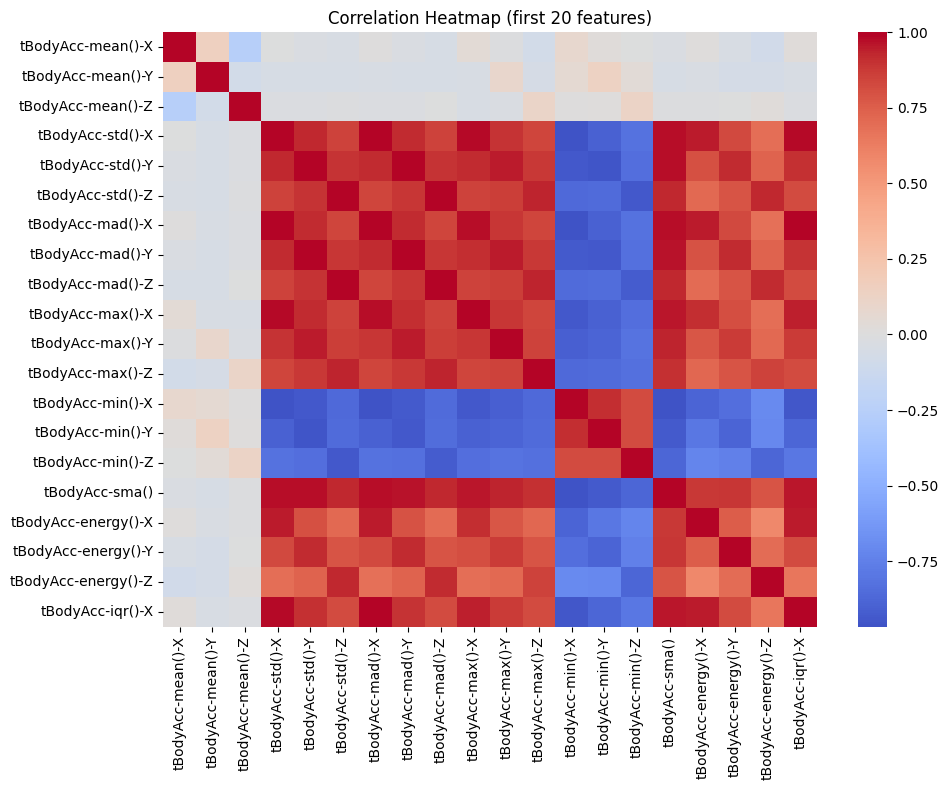

In [85]:
# -----------------------------
# Correlation heatmap (subset)
# -----------------------------
plt.figure(figsize=(10, 8))
corr = X_train.corr().iloc[:20, :20]  # smaller subset for readability
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap (first 20 features)")
plt.tight_layout()
plt.show()

## Analysis of tBodyAcc-mean()-X

This boxplot shows how the feature **`tBodyAcc-mean()-X`** varies for each activity:

- **Boxes**: represent the interquartile range (25th–75th percentile) for the feature within that activity.  
- **Median line**: the line inside each box shows the median value.  
- **Whiskers**: extend to cover most of the remaining data.  
- **Outliers**: individual points beyond the whiskers, representing unusual sensor readings.  

### How to interpret:

1. **Feature separability**  
   - If the boxes for two activities do **not overlap much**, the feature helps distinguish those activities.  
   - Example: WALKING may have a higher median than SITTING, indicating this feature is informative.

2. **Variability**  
   - Tall boxes → feature values vary a lot within that activity.  
   - Short boxes → feature is consistent for that activity.

3. **Outliers**  
   - Points outside the whiskers may represent sudden or rare movements.  
   - They can be left in or filtered, depending on modeling strategy.

4. **Class overlap**  
   - If two activities’ boxes overlap heavily, this feature is **less useful** for separating those activities.

### Takeaway:

Boxplots provide a **visual summary of how each feature behaves across classes**, helping us identify which features are most discriminative before training a classifier.


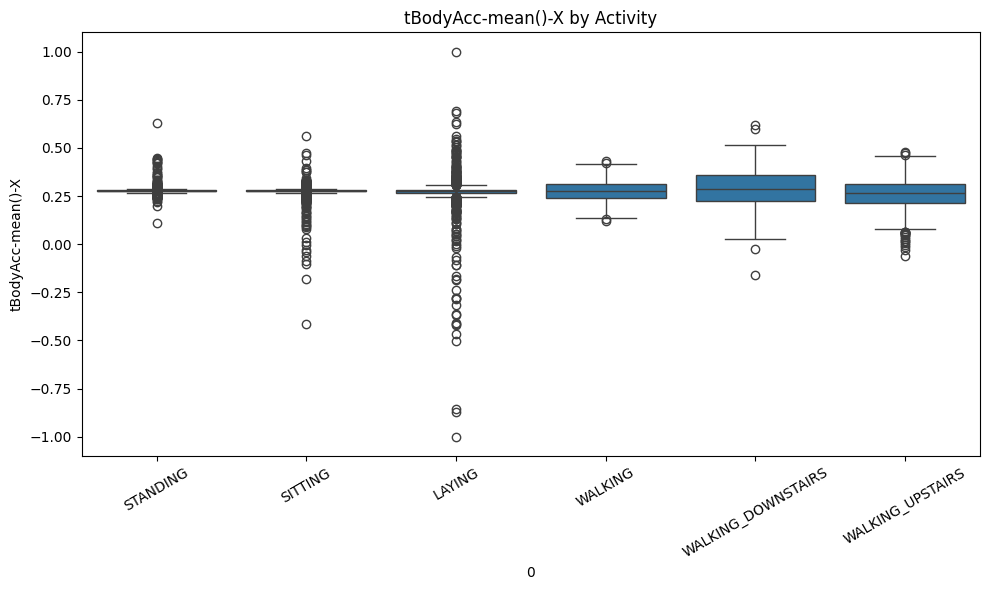

In [86]:
# -----------------------------
# Distribution of one feature across activities
# -----------------------------
plt.figure(figsize=(10, 6))
sns.boxplot(x=y_train, y=X_train["tBodyAcc-mean()-X"])
plt.xticks(rotation=30)
plt.title("tBodyAcc-mean()-X by Activity")
plt.tight_layout()
plt.show()

## PCA Visualization of the UCI HAR Dataset

In this section, we use **Principal Component Analysis (PCA)** to reduce the 561-dimensional feature space down to **2 components** for visualization purposes.

### What the code does:

1. **PCA computation**
   - `PCA(n_components=2)` reduces the feature matrix `X_train` to 2 dimensions.
   - These two principal components capture the directions of **maximum variance** in the data.

2. **Scatter plot**
   - Each point represents one training sample in the 2D PCA space.
   - **Color (`hue=y_train`)** indicates the activity label.
   - `alpha=0.6` makes overlapping points semi-transparent.

### How to interpret the plot:

1. **Clustering of activities**
   - Points of the same color that cluster together indicate that the features **naturally separate that activity**.
   - For example, dynamic activities (WALKING, WALKING_UPSTAIRS) might cluster separately from static activities (SITTING, STANDING, LAYING).

2. **Overlap**
   - Some activities may overlap in PCA space, indicating that **linear separation is harder** for those classes.
   - Overlap suggests the model may need more complex boundaries (e.g., nonlinear classifiers) to distinguish those activities.

3. **Variance explained**
   - PCA components capture the directions of highest variance but **don’t guarantee maximum class separability**.
   - Still, this is a useful visualization for understanding the overall structure of the data.

### Takeaway:

- PCA allows us to **see the high-dimensional dataset in 2D**.
- Clustering patterns give insight into which activities are easily separable and which may be harder to classify.
- This is purely for visualization and exploratory purposes; the classifier will still use all 561 features.



Running PCA for visualization...


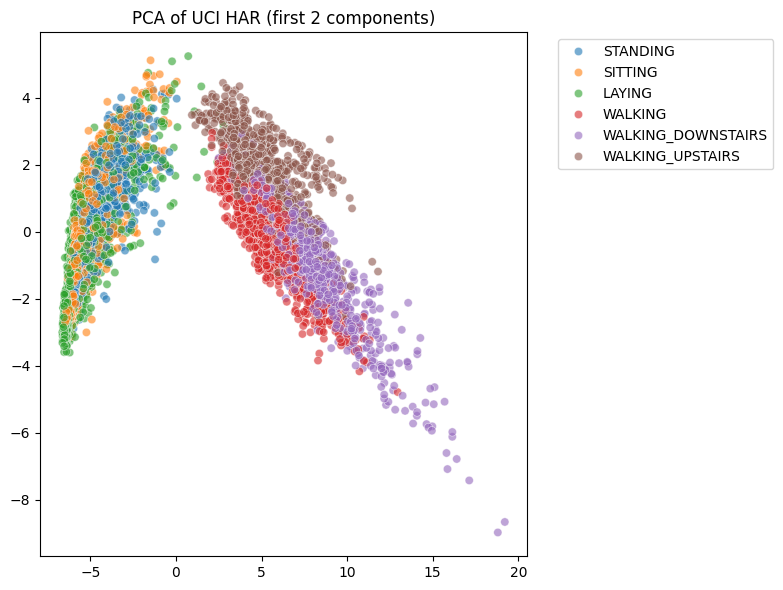

In [87]:
# -----------------------------
# PCA for visualization
# -----------------------------
print("\nRunning PCA for visualization...")
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_train, palette="tab10", alpha=0.6)
plt.title("PCA of UCI HAR (first 2 components)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()